# CBFM

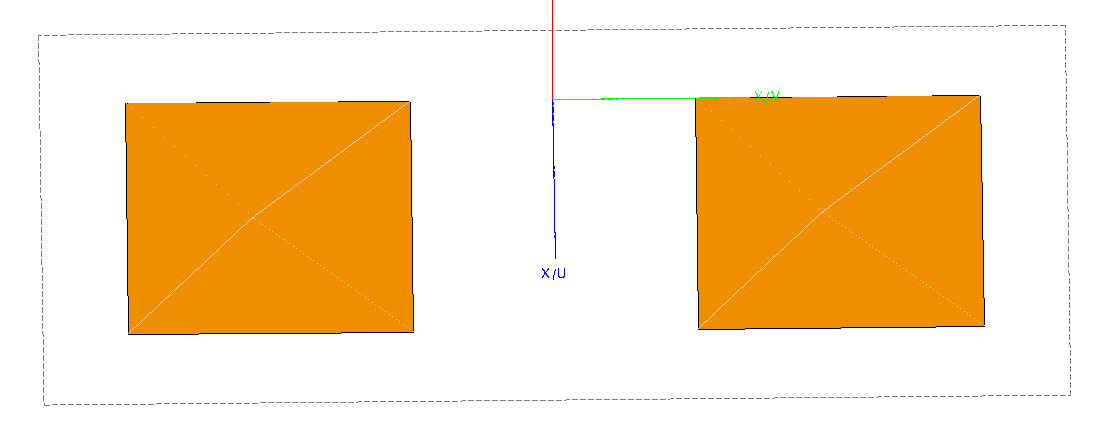

In [1]:
import numpy as np

## Import Zmn and Vrhs from FEKO

In [2]:
z = np.array([
[-0.00982588995248079 + 1.76442635059357j,  	9.40086611080915e-05 + 0.707664191722870j,	 9.03860709513538e-05 + 0.686613559722900j,	  0.00845715310424566 - 0.346320450305939j,	-0.00767177063971758 - 0.00701530091464520j,	 -0.000606303277891129 - 0.0143927838653326j, 0.00115225021727383 + 0.0110866632312536j,	0.00567421549931169 + 0.000892252137418836j],
[9.40086611080915e-05 + 0.707664191722870j, 	-0.00982588995248079 + 1.76442635059357j,	 0.00845715310424566 - 0.346320450305939j,	  9.03860709513538e-05 + 0.686613559722900j,	-0.000606303277891129 - 0.0143927838653326j, -0.00767177063971758 - 0.00701530091464520j, 0.00567421549931169 + 0.000892252137418836j,	0.00115225021727383 + 0.0110866632312536j],
[9.07852445379831e-05 + 0.681661367416382j,	    0.00845755450427532 - 0.351133972406387j,	 -0.00770689826458693 + 1.48247992992401j,	  8.64808753249236e-05 + 0.666199922561646j,	0.000166826750501059 + 0.0175046268850565j,	 0.00756492139771581 + 0.0153545029461384j,	  -0.00601607700809836 - 0.00545952655375004j,	-0.000465389573946595 - 0.0112562021240592j],
[0.00845755450427532 - 0.351133972406387j,	    9.07852445379831e-05 + 0.681661367416382j,	 8.64808753249236e-05 + 0.666199922561646j,	  -0.00770689826458693 + 1.48247992992401j,	0.00756492139771581 + 0.0153545029461384j,	     0.000166826750501059 + 0.0175046268850565j,  -0.000465389573946595 - 0.0112562021240592j,	-0.00601607700809836 - 0.00545952655375004j],
[-0.00767179811373353 - 0.00704326992854476j,   -0.000606521440204233 - 0.0144238974899054j, 0.000166591606102884 + 0.0174861345440149j,  0.00756463780999184 + 0.0153312394395471j,	-0.00982588995248079 + 1.76442635059357j,	 9.40086611080915e-05 + 0.707664191722870j,	  9.03860709513538e-05 + 0.686613559722900j,	0.00845715310424566 - 0.346320450305939j],
[-0.000606521440204233 - 0.0144238974899054j,	-0.00767179811373353 - 0.00704326992854476j, 0.00756463780999184 + 0.0153312394395471j,	  0.000166591606102884 + 0.0174861345440149j,	9.40086611080915e-05 + 0.707664191722870j,	 -0.00982588995248079 + 1.76442635059357j,	  0.00845715310424566 - 0.346320450305939j,	9.03860709513538e-05 + 0.686613559722900j],
[0.00115225801710039 + 0.0110928667709231j,	    0.00567421223968267 + 0.000894971308298409j, -0.00601634196937084 - 0.00544102629646659j, -0.000465574936242774 - 0.0112418243661523j,	9.07852445379831e-05 + 0.681661367416382j,	 0.00845755450427532 - 0.351133972406387j,	  -0.00770689826458693 + 1.48247992992401j,	8.64808753249236e-05 + 0.666199922561646j],
[0.00567421223968267 + 0.000894971308298409j,	0.00115225801710039 + 0.0110928667709231j,	 -0.000465574936242774 - 0.0112418243661523j, -0.00601634196937084 - 0.00544102629646659j,	0.00845755450427532 - 0.351133972406387j,	 9.07852445379831e-05 + 0.681661367416382j,	  8.64808753249236e-05 + 0.666199922561646j,	-0.00770689826458693 + 1.48247992992401j]
])

In [3]:
z.shape

(8, 8)

In [4]:
v = np.array([0.00250546784369298,
              -0.00250546784369298,
              0.00221743479926410,
              -0.00221743479926410,
              0.00250546784369299,
              -0.00250546784369299,
              0.00221743479926409,
              -0.00221743479926409])

In [5]:
v.shape

(8,)

In [6]:
ifeko = np.linalg.inv(z).dot(v)


In [7]:
ifeko, ifeko.shape

(array([-3.34799060e-05-0.00123639j,  3.34799060e-05+0.00123639j,
         2.28159112e-07-0.00113976j, -2.28159112e-07+0.00113976j,
        -1.38564891e-06-0.00115033j,  1.38564891e-06+0.00115033j,
        -3.60305231e-05-0.00123697j,  3.60305231e-05+0.00123697j]), (8,))

## Separate Zmn and Vrhs into blocks based on domains

In [8]:
z11 = z[0:4, 0:4] #self block 1
z12 = z[0:4, 4:8] #coupling
z22 = z[4:8, 4:8] #self block 2
z21 = z[4:8, 0:4] #coupling

In [9]:
z11

array([[-9.82588995e-03+1.76442635j,  9.40086611e-05+0.70766419j,
         9.03860710e-05+0.68661356j,  8.45715310e-03-0.34632045j],
       [ 9.40086611e-05+0.70766419j, -9.82588995e-03+1.76442635j,
         8.45715310e-03-0.34632045j,  9.03860710e-05+0.68661356j],
       [ 9.07852445e-05+0.68166137j,  8.45755450e-03-0.35113397j,
        -7.70689826e-03+1.48247993j,  8.64808753e-05+0.66619992j],
       [ 8.45755450e-03-0.35113397j,  9.07852445e-05+0.68166137j,
         8.64808753e-05+0.66619992j, -7.70689826e-03+1.48247993j]])

In [10]:
z12

array([[-0.00767177-0.0070153j , -0.0006063 -0.01439278j,
         0.00115225+0.01108666j,  0.00567422+0.00089225j],
       [-0.0006063 -0.01439278j, -0.00767177-0.0070153j ,
         0.00567422+0.00089225j,  0.00115225+0.01108666j],
       [ 0.00016683+0.01750463j,  0.00756492+0.0153545j ,
        -0.00601608-0.00545953j, -0.00046539-0.0112562j ],
       [ 0.00756492+0.0153545j ,  0.00016683+0.01750463j,
        -0.00046539-0.0112562j , -0.00601608-0.00545953j]])

In [11]:
z21

array([[-0.0076718 -0.00704327j, -0.00060652-0.0144239j ,
         0.00016659+0.01748613j,  0.00756464+0.01533124j],
       [-0.00060652-0.0144239j , -0.0076718 -0.00704327j,
         0.00756464+0.01533124j,  0.00016659+0.01748613j],
       [ 0.00115226+0.01109287j,  0.00567421+0.00089497j,
        -0.00601634-0.00544103j, -0.00046557-0.01124182j],
       [ 0.00567421+0.00089497j,  0.00115226+0.01109287j,
        -0.00046557-0.01124182j, -0.00601634-0.00544103j]])

In [12]:
z22

array([[-9.82588995e-03+1.76442635j,  9.40086611e-05+0.70766419j,
         9.03860710e-05+0.68661356j,  8.45715310e-03-0.34632045j],
       [ 9.40086611e-05+0.70766419j, -9.82588995e-03+1.76442635j,
         8.45715310e-03-0.34632045j,  9.03860710e-05+0.68661356j],
       [ 9.07852445e-05+0.68166137j,  8.45755450e-03-0.35113397j,
        -7.70689826e-03+1.48247993j,  8.64808753e-05+0.66619992j],
       [ 8.45755450e-03-0.35113397j,  9.07852445e-05+0.68166137j,
         8.64808753e-05+0.66619992j, -7.70689826e-03+1.48247993j]])

In [13]:
v1 = v[0:4]
v2 = v[4:8]

In [14]:
v1

array([ 0.00250547, -0.00250547,  0.00221743, -0.00221743])

In [15]:
v2

array([ 0.00250547, -0.00250547,  0.00221743, -0.00221743])

## Primary CBF's

In [16]:
j_prim_1 = np.linalg.inv(z11).dot(v1)

In [17]:
j_prim_2 = np.linalg.inv(z22).dot(v2)

In [18]:
j_prim_1, j_prim_1.shape

(array([-1.03565086e-05-0.00120121j,  1.03565086e-05+0.00120121j,
        -1.06320139e-05-0.00119648j,  1.06320139e-05+0.00119648j]), (4,))

In [19]:
j_prim_2, j_prim_2.shape

(array([-1.03565086e-05-0.00120121j,  1.03565086e-05+0.00120121j,
        -1.06320139e-05-0.00119648j,  1.06320139e-05+0.00119648j]), (4,))

## Secondary CBF's

In [20]:
j_sec_1_on_2 = np.linalg.inv(z11).dot(-np.linalg.inv(z12).dot(j_prim_2))

In [21]:
j_sec_2_on_1 = np.linalg.inv(z22).dot(-np.linalg.inv(z21).dot(j_prim_1))

In [22]:
j_sec_1_on_2, j_sec_1_on_2.shape

(array([ 0.23971757-3.42964589j, -0.23971757+3.42964589j,
        -0.23571011+3.84620293j,  0.23571011-3.84620293j]), (4,))

In [23]:
j_sec_2_on_1, j_sec_2_on_1.shape

(array([ 1.0592769 +2.53018119j, -1.0592769 -2.53018119j,
        -1.16157661-2.88679099j,  1.16157661+2.88679099j]), (4,))

## Concatenating J vectors

In [24]:
j_cbfm_1 = np.transpose(np.vstack((j_prim_1, j_sec_1_on_2)))

In [25]:
j_cbfm_2 = np.transpose(np.vstack((j_prim_2, j_sec_2_on_1)))

In [26]:
j_cbfm_1, j_cbfm_1.shape

(array([[-1.03565086e-05-1.20121041e-03j,  2.39717568e-01-3.42964589e+00j],
        [ 1.03565086e-05+1.20121041e-03j, -2.39717568e-01+3.42964589e+00j],
        [-1.06320139e-05-1.19647764e-03j, -2.35710108e-01+3.84620293e+00j],
        [ 1.06320139e-05+1.19647764e-03j,  2.35710108e-01-3.84620293e+00j]]),
 (4, 2))

In [27]:
j_cbfm_2, j_cbfm_2.shape

(array([[-1.03565086e-05-1.20121041e-03j,  1.05927690e+00+2.53018119e+00j],
        [ 1.03565086e-05+1.20121041e-03j, -1.05927690e+00-2.53018119e+00j],
        [-1.06320139e-05-1.19647764e-03j, -1.16157661e+00-2.88679099e+00j],
        [ 1.06320139e-05+1.19647764e-03j,  1.16157661e+00+2.88679099e+00j]]),
 (4, 2))

## Reduced Equation

### Zred

In [28]:
z_cbfm_1_1 = np.transpose(j_cbfm_1).dot(z11.dot(j_cbfm_1))

In [29]:
z_cbfm_1_2 = np.transpose(j_cbfm_1).dot(z12.dot(j_cbfm_2))

In [30]:
z_cbfm_2_1 = np.transpose(j_cbfm_2).dot(z21.dot(j_cbfm_1))

In [31]:
z_cbfm_2_2 = np.transpose(j_cbfm_2).dot(z22.dot(j_cbfm_2))

In [32]:
z_cbfm_1_1, z_cbfm_1_1.shape

(array([[-9.90473938e-08-1.13254104e-05j,  1.55728851e-04-1.25905715e-04j],
        [ 1.55865723e-04-1.28326506e-04j, -6.91359660e-01+5.46904770e+00j]]),
 (2, 2))

In [33]:
z_cbfm_1_2, z_cbfm_1_2.shape

(array([[ 6.92567092e-08-7.45985544e-08j, -3.87590548e-05-4.38609489e-05j],
        [-1.91384725e-05-7.17274883e-05j, -6.27705849e-03+1.68002935e-02j]]),
 (2, 2))

In [34]:
z_cbfm_2_1, z_cbfm_2_1.shape

(array([[ 6.92554341e-08-7.46431506e-08j, -1.91413981e-05-7.17000712e-05j],
        [-3.87582620e-05-4.38663959e-05j, -6.28252216e-03+1.67839474e-02j]]),
 (2, 2))

In [35]:
z_cbfm_2_2, z_cbfm_2_2.shape

(array([[-9.90473938e-08-1.13254104e-05j,  1.55773370e-04-1.25761238e-04j],
        [ 1.56527625e-04-1.23966399e-04j,  2.50845895e+00+2.52177774e+00j]]),
 (2, 2))

### Vred

In [36]:
v_cbfm_1 = np.transpose(j_cbfm_1).dot(v1)

In [37]:
v_cbfm_2 = np.transpose(j_cbfm_2).dot(v2)

In [38]:
v_cbfm_1, v_cbfm_1.shape

(array([-9.90473938e-08-1.13254104e-05j,  1.55865723e-04-1.28326506e-04j]),
 (2,))

In [39]:
v_cbfm_2, v_cbfm_2.shape

(array([-9.90473938e-08-1.13254104e-05j,  1.56527625e-04-1.23966399e-04j]),
 (2,))

### Concatenate Zred and Vred

In [40]:
z_col_block_1 = np.vstack((z_cbfm_1_1, z_cbfm_2_1))
z_col_block_2 = np.vstack((z_cbfm_2_1, z_cbfm_2_2))
ZCBFM = np.hstack((z_col_block_1, z_col_block_2))

In [41]:
z_col_block_1

array([[-9.90473938e-08-1.13254104e-05j,  1.55728851e-04-1.25905715e-04j],
       [ 1.55865723e-04-1.28326506e-04j, -6.91359660e-01+5.46904770e+00j],
       [ 6.92554341e-08-7.46431506e-08j, -1.91413981e-05-7.17000712e-05j],
       [-3.87582620e-05-4.38663959e-05j, -6.28252216e-03+1.67839474e-02j]])

In [42]:
z_col_block_2

array([[ 6.92554341e-08-7.46431506e-08j, -1.91413981e-05-7.17000712e-05j],
       [-3.87582620e-05-4.38663959e-05j, -6.28252216e-03+1.67839474e-02j],
       [-9.90473938e-08-1.13254104e-05j,  1.55773370e-04-1.25761238e-04j],
       [ 1.56527625e-04-1.23966399e-04j,  2.50845895e+00+2.52177774e+00j]])

In [43]:
ZCBFM

array([[-9.90473938e-08-1.13254104e-05j,  1.55728851e-04-1.25905715e-04j,
         6.92554341e-08-7.46431506e-08j, -1.91413981e-05-7.17000712e-05j],
       [ 1.55865723e-04-1.28326506e-04j, -6.91359660e-01+5.46904770e+00j,
        -3.87582620e-05-4.38663959e-05j, -6.28252216e-03+1.67839474e-02j],
       [ 6.92554341e-08-7.46431506e-08j, -1.91413981e-05-7.17000712e-05j,
        -9.90473938e-08-1.13254104e-05j,  1.55773370e-04-1.25761238e-04j],
       [-3.87582620e-05-4.38663959e-05j, -6.28252216e-03+1.67839474e-02j,
         1.56527625e-04-1.23966399e-04j,  2.50845895e+00+2.52177774e+00j]])

In [44]:
VCBFM = np.hstack((v_cbfm_1, v_cbfm_2))

In [45]:
VCBFM, VCBFM.shape

(array([-9.90473938e-08-1.13254104e-05j,  1.55865723e-04-1.28326506e-04j,
        -9.90473938e-08-1.13254104e-05j,  1.56527625e-04-1.23966399e-04j]),
 (4,))

### Get ICBFM

In [46]:
ICBFM = np.linalg.inv(ZCBFM).dot(VCBFM)

In [47]:
ICBFM, ICBFM.shape

(array([9.93171794e-01-6.06898309e-03j, 6.83402906e-06-8.31098000e-06j,
        9.93264757e-01-6.26292523e-03j, 1.66614225e-05+5.15735202e-07j]), (4,))

## Solve IRWG

In [48]:
irwg_1 = (ICBFM[0] * j_prim_1) + (ICBFM[1] * j_sec_1_on_2)

In [49]:
irwg_2 = (ICBFM[2] * j_prim_2) + (ICBFM[3] * j_sec_2_on_1)

In [50]:
irwg_1, irwg_1.size

(array([-4.44413994e-05-0.00121838j,  4.44413994e-05+0.00121838j,
         1.25340470e-05-0.00116j   , -1.25340470e-05+0.00116j   ]), 4)

In [51]:
irwg_2, irwg_2.size

(array([-1.46568955e-06-0.00115035j,  1.46568955e-06+0.00115035j,
        -3.59185536e-05-0.00123705j,  3.59185536e-05+0.00123705j]), 4)

In [52]:
IRWG = np.hstack((irwg_1, irwg_2))

In [53]:
IRWG

array([-4.44413994e-05-0.00121838j,  4.44413994e-05+0.00121838j,
        1.25340470e-05-0.00116j   , -1.25340470e-05+0.00116j   ,
       -1.46568955e-06-0.00115035j,  1.46568955e-06+0.00115035j,
       -3.59185536e-05-0.00123705j,  3.59185536e-05+0.00123705j])

In [54]:
ifeko

array([-3.34799060e-05-0.00123639j,  3.34799060e-05+0.00123639j,
        2.28159112e-07-0.00113976j, -2.28159112e-07+0.00113976j,
       -1.38564891e-06-0.00115033j,  1.38564891e-06+0.00115033j,
       -3.60305231e-05-0.00123697j,  3.60305231e-05+0.00123697j])

## Error

In [55]:
diff_sum = 0
ref_sum = 0

for i in range(ifeko.size):
    diff_sum = diff_sum + np.power((np.abs(IRWG[i] - ifeko[i])) , 2)
    ref_sum = ref_sum + np.power(np.abs(ifeko[i]), 2)
    
error_norm_percentage = (np.sqrt(diff_sum) / np.sqrt(ref_sum)) * 100

In [56]:
error_norm_percentage

1.3303616325760814